# Arima monthly

In [1]:
import pickle
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [2]:
with open('monthly_streamflow.pickle', 'rb') as handle:
    x = pickle.load(handle)

In [3]:
streamflow = x.fillna(method='ffill')

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [5]:
model = ARIMA(streamflow, order=(5,1,0))

In [6]:
model_fit = model.fit(disp=0)

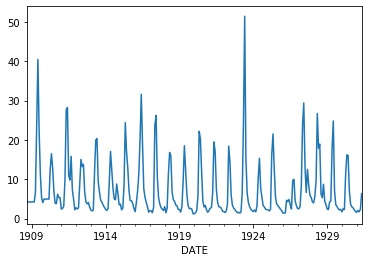

In [7]:
streamflow.plot()

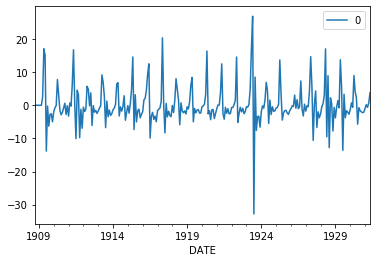

In [8]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

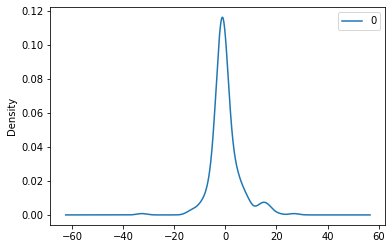

                0
count  272.000000
mean    -0.000166
std      5.755548
min    -32.794871
25%     -2.445334
50%     -0.823866
75%      1.281392
max     26.841436


In [9]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
size = int(len(streamflow) * 0.66)
train, test = streamflow[0:size], streamflow[size:len(streamflow)]

history = [x for x in train]

predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = test[t]
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=15.004312, expected=4.080667
predicted=7.044482, expected=3.027419
predicted=5.618287, expected=2.383000
predicted=10.573853, expected=2.027097
predicted=3.790207, expected=1.769355
predicted=2.366809, expected=2.187586
predicted=2.584042, expected=1.709677
predicted=1.627744, expected=3.159667
predicted=3.551003, expected=10.439032
predicted=11.048840, expected=15.317000
predicted=13.277225, expected=7.656129
predicted=3.710480, expected=5.403226
predicted=6.239779, expected=3.297000
predicted=3.285102, expected=2.928065
predicted=4.190445, expected=2.384000
predicted=4.005880, expected=2.266129
predicted=3.025668, expected=2.210000
predicted=2.623168, expected=1.952143
predicted=2.044487, expected=2.391935
predicted=2.627161, expected=16.289333
predicted=18.278468, expected=21.506452
predicted=17.305447, expected=12.753333
predicted=7.756795, expected=5.532258
predicted=5.375133, expected=3.690968
predicted=4.782081, expected=3.284000
predicted=5.195096, expected=2.873871
p

In [12]:
test.head()

DATE
1923-09-30    4.080667
1923-10-31    3.027419
1923-11-30    2.383000
1923-12-31    2.027097
1924-01-31    1.769355
Freq: M, Name: FLOW, dtype: float64

In [49]:
pred = pd.DataFrame(predictions)
pred.index = test.index
pred = pred[0]

Text(0.5, 1.0, 'ARIMA')

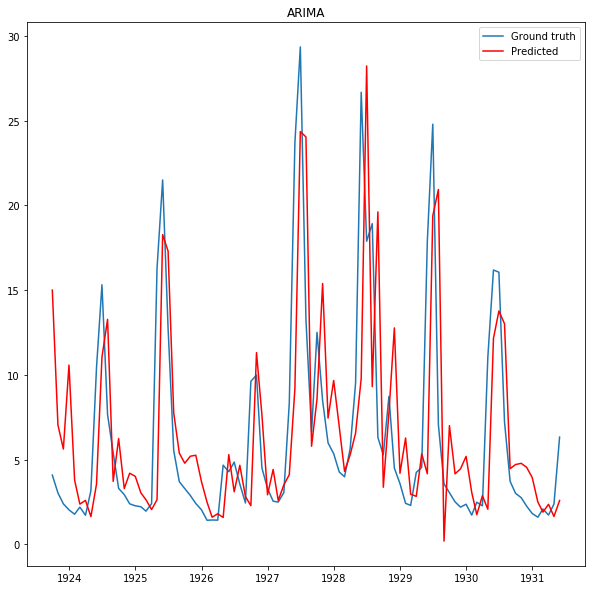

In [50]:
plt.figure(figsize=(10,10))

plt.plot(test, label="Ground truth")
plt.plot(pred, color='red', label="Predicted")
plt.legend()

plt.title("ARIMA")

Text(0.5, 1.0, 'ARIMA')

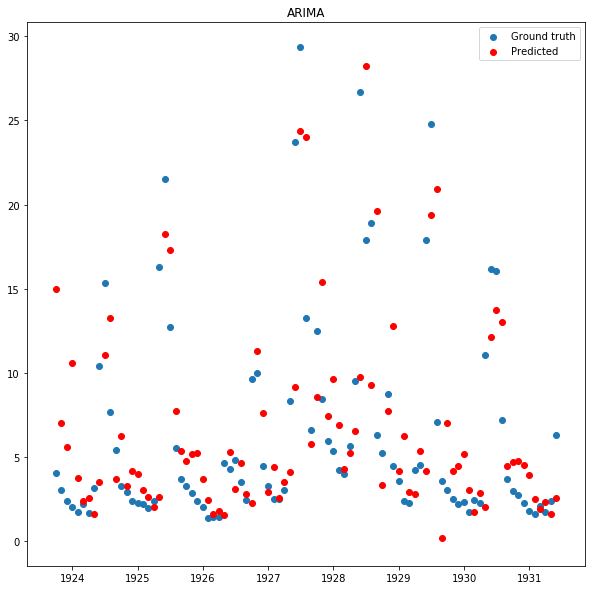

In [51]:
plt.figure(figsize=(10,10))

plt.scatter(test.index, test, label="Ground truth")
plt.scatter(test.index, pred, color='red', label="Predicted")
plt.legend()

plt.title("ARIMA")

Text(0.5, 1.0, 'ARIMA')

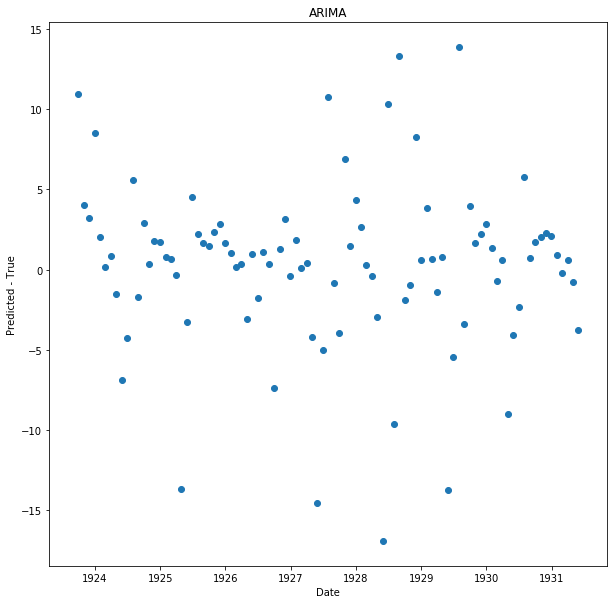

In [52]:
plt.figure(figsize=(10,10))

plt.scatter(test.index, pred.values - test.values)
plt.xlabel("Date")
plt.ylabel("Predicted - True")

plt.title("ARIMA")

Text(0.5, 1.0, 'ARIMA')

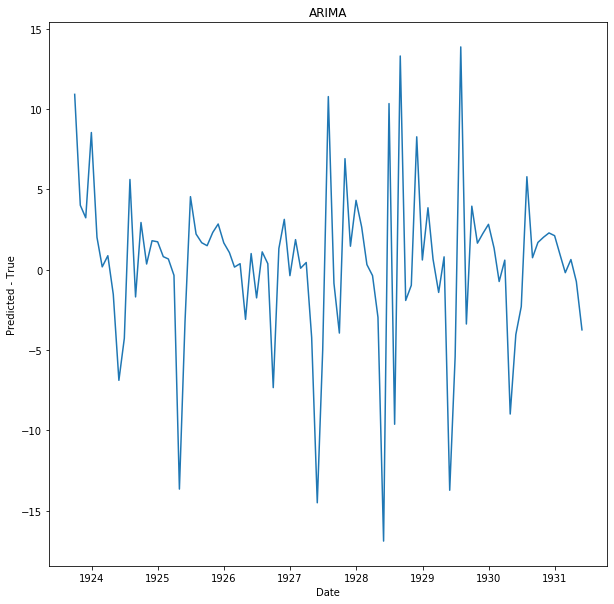

In [53]:
plt.figure(figsize=(10,10))

plt.plot(pred - test)
plt.xlabel("Date")
plt.ylabel("Predicted - True")

plt.title("ARIMA")

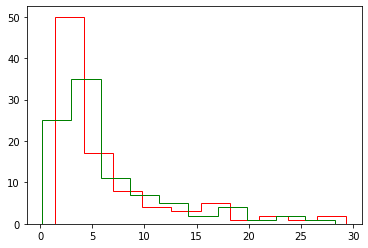

In [56]:
plt.hist(test, histtype='step', color='red');
plt.hist(pred, histtype='step', color='green');

Text(0.5, 1.0, 'ARIMA')

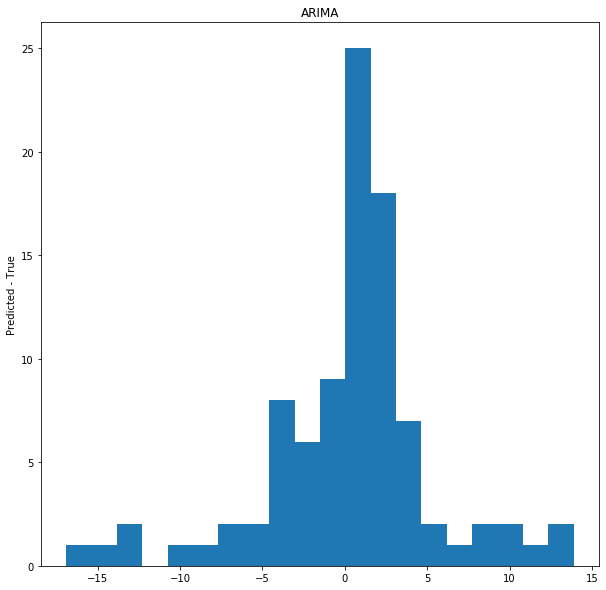

In [59]:
plt.figure(figsize=(10,10))

plt.hist(pred - test, bins=20)
#plt.xlabel("Date")
plt.ylabel("Predicted - True")

plt.title("ARIMA")

Text(0.5, 1.0, 'ARIMA')

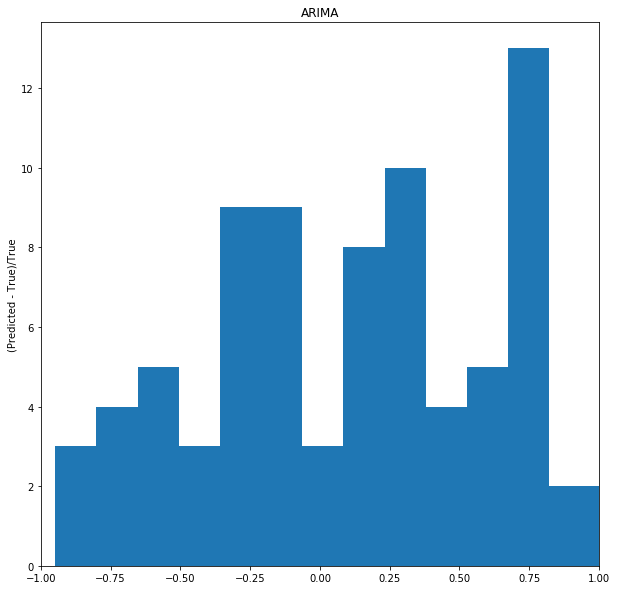

In [68]:
plt.figure(figsize=(10,10))

plt.hist((pred - test)/test, bins=35)
#plt.xlabel("Date")
plt.ylabel("(Predicted - True)/True")
plt.xlim(-1,1)

plt.title("ARIMA")

In [65]:
len(pred)

93